In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

C:\Users\chandrikathupakula\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\chandrikathupakula\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,

In [2]:
df=pd.read_csv("SBnational.csv")
df.head()

C:\Users\chandrikathupakula\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [4]:
df.drop('LowDoc',axis=1,inplace=True)
df.drop('ChgOffDate',axis=1,inplace=True)
df.drop('DisbursementDate',axis=1,inplace=True)
df.drop('DisbursementGross',axis=1,inplace=True)
df.drop('BalanceGross',axis=1,inplace=True)
df.drop('MIS_Status',axis=1,inplace=True)
df.drop('ChgOffPrinGr',axis=1,inplace=True)
df.drop('GrAppv',axis=1,inplace=True)
df.drop('SBA_Appv',axis=1,inplace=True)

In [5]:
df.drop('City',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanNr_ChkDgt  899164 non-null  int64  
 1   Name           899150 non-null  object 
 2   State          899150 non-null  object 
 3   Zip            899164 non-null  int64  
 4   Bank           897605 non-null  object 
 5   BankState      897598 non-null  object 
 6   NAICS          899164 non-null  int64  
 7   ApprovalDate   899164 non-null  object 
 8   ApprovalFY     899164 non-null  object 
 9   Term           899164 non-null  int64  
 10  NoEmp          899164 non-null  int64  
 11  NewExist       899028 non-null  float64
 12  CreateJob      899164 non-null  int64  
 13  RetainedJob    899164 non-null  int64  
 14  FranchiseCode  899164 non-null  int64  
 15  UrbanRural     899164 non-null  int64  
 16  RevLineCr      894636 non-null  object 
dtypes: float64(1), int64(9), obje

In [7]:
df.shape

(899164, 17)

In [8]:
df["Date"]=pd.to_datetime(df["ApprovalDate"])
df["Date"]

0        1997-02-28
1        1997-02-28
2        1997-02-28
3        1997-02-28
4        1997-02-28
            ...    
899159   1997-02-27
899160   1997-02-27
899161   1997-02-27
899162   1997-02-27
899163   1997-02-27
Name: Date, Length: 899164, dtype: datetime64[ns]

In [9]:
df.drop("ApprovalDate",axis=1,inplace=True)

In [10]:
df.drop("ApprovalFY",axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   LoanNr_ChkDgt  899164 non-null  int64         
 1   Name           899150 non-null  object        
 2   State          899150 non-null  object        
 3   Zip            899164 non-null  int64         
 4   Bank           897605 non-null  object        
 5   BankState      897598 non-null  object        
 6   NAICS          899164 non-null  int64         
 7   Term           899164 non-null  int64         
 8   NoEmp          899164 non-null  int64         
 9   NewExist       899028 non-null  float64       
 10  CreateJob      899164 non-null  int64         
 11  RetainedJob    899164 non-null  int64         
 12  FranchiseCode  899164 non-null  int64         
 13  UrbanRural     899164 non-null  int64         
 14  RevLineCr      894636 non-null  object        
 15  

In [12]:
df.head()

,LoanNr_ChkDgt,Name,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,Date
0,1000014003,ABC HOBBYCRAFT,IN,47711,FIFTH THIRD BANK,OH,451120,84,4,2.0,0,0,1,0,N,1997-02-28
1,1000024006,LANDMARK BAR & GRILLE (THE),IN,46526,1ST SOURCE BANK,IN,722410,60,2,2.0,0,0,1,0,N,1997-02-28
2,1000034009,"WHITLOCK DDS, TODD M.",IN,47401,GRANT COUNTY STATE BANK,IN,621210,180,7,1.0,0,0,1,0,N,1997-02-28
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,60,2,1.0,0,0,1,0,N,1997-02-28
4,1000054004,"ANASTASIA CONFECTIONS, INC.",FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,240,14,1.0,7,7,1,0,N,1997-02-28


In [13]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


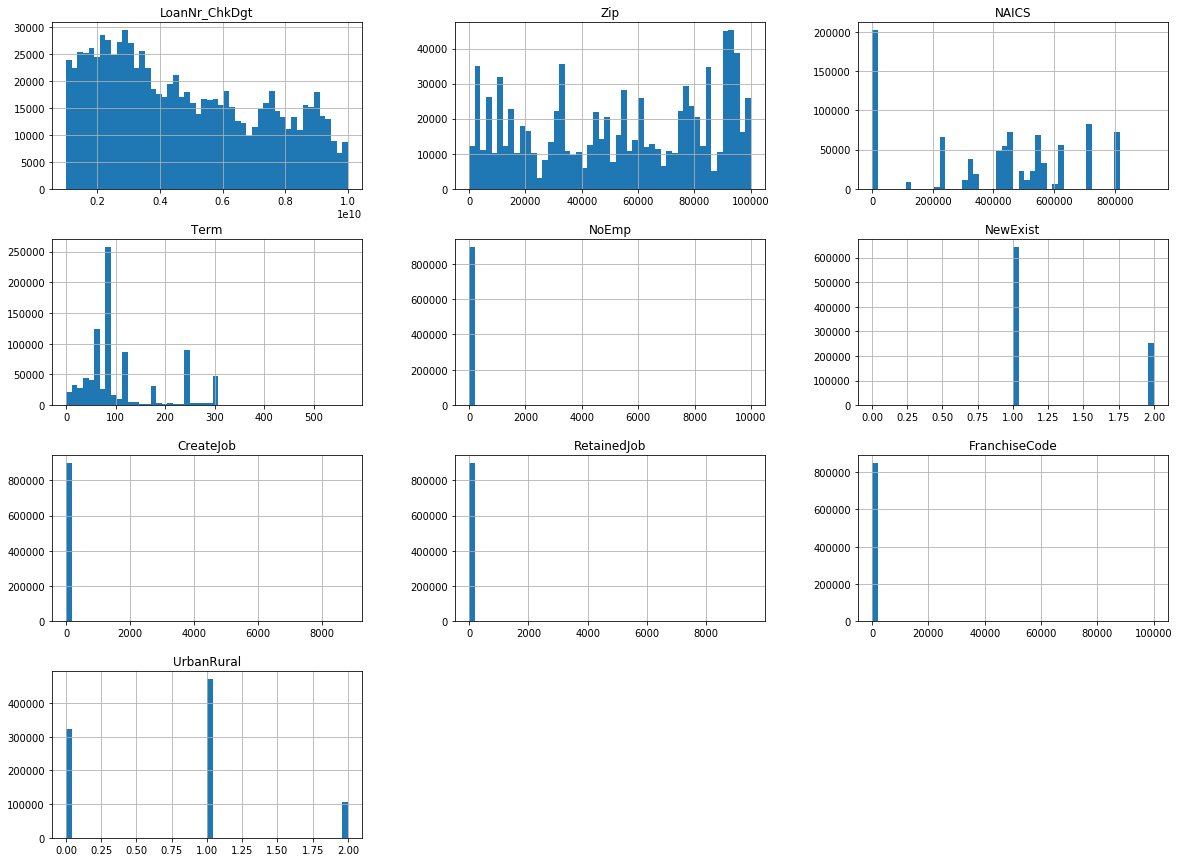

In [14]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [15]:
X=df.iloc[:,:-1].values
y=df.iloc[:,:-1].values

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
def handle_outliers(x): 
 
 if np.isnan(x): 
      x = x.NewExist() 
 elif np.isinf(x): 
      x = x.max() 
 else: 
      x = x 
  
 return x 
 
# applying the function to the dataset 
df = df.applymap(lambda x: handle_outliers(x))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)
print(y_pred)